## Connecting populations with random connections
* https://nest-simulator.readthedocs.io/en/latest/tutorials/pynest_tutorial/part_2_populations_of_neurons.html#pynest-tutorial-2

In [1]:
import nest
import matplotlib.pyplot as plt
%matplotlib inline

[admin:1423419] shmem: mmap: an error occurred while determining whether or not /tmp/ompi.admin.1000/jf.0/2309226496/shared_mem_cuda_pool.admin could be created.
[admin:1423419] create_and_attach: unable to create shared memory BTL coordinating structure :: size 134217728 



              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.8.0-post0.dev0
 Built: Oct  2 2024 11:54:50

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
## another way is CopyModel
edict = {"I_e": 200.0, "tau_m": 20.0}
nest.CopyModel("iaf_psc_alpha", "exc_iaf_psc_alpha") 
# create a new model called exc_iaf_psc_alpha
# from existing model iaf_psc_alpha
nest.SetDefaults("exc_iaf_psc_alpha", edict)

In [3]:
idict = {"I_e": 300.0}
nest.CopyModel("iaf_psc_alpha", "inh_iaf_psc_alpha", params=idict) # one line

In [4]:
epop1 = nest.Create("exc_iaf_psc_alpha", 100)
epop2 = nest.Create("exc_iaf_psc_alpha", 100)
ipop1 = nest.Create("inh_iaf_psc_alpha", 30)
ipop2 = nest.Create("inh_iaf_psc_alpha", 30)

In [5]:
d = 1.0
Je = 2.0
Ke = 20
Ji = -4.0
Ki = 12
conn_dict_ex = {"rule": "fixed_indegree", "indegree": Ke}
conn_dict_in = {"rule": "fixed_indegree", "indegree": Ki}
syn_dict_ex = {"delay": d, "weight": Je}
syn_dict_in = {"delay": d, "weight": Ji}
nest.Connect(epop1, ipop1, conn_dict_ex, syn_dict_ex)
nest.Connect(ipop1, epop1, conn_dict_in, syn_dict_in)

* The connection rule fixed_indegree allows us to create n random connections for each neuron in the target population post to a randomly selected neuron from the source population pre. The variables weight and delay can be left unspecified, in which case the default weight and delay are used. Alternatively we can set them in the syn_spec , so each created connection has the same weight and delay. 

In [6]:
multimeter = nest.Create("multimeter", 100) # create 100 multimeters, one for each neuron
# if you omit the number, it will create error with SLI
multimeter.set({"record_from": ["V_m"]})
nest.Connect(multimeter, epop1, "one_to_one")

In [7]:
nest.Simulate(1000.0)


Oct 02 12:47:29 NodeManager::prepare_nodes [Info]: 
    Preparing 360 nodes for simulation.

Oct 02 12:47:29 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 360
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Oct 02 12:47:29 SimulationManager::run [Info]: 
    Simulation finished.


In [8]:
dmm = multimeter.get()
Vms = dmm["events"][0]["V_m"]
times = dmm["events"][0]["times"]

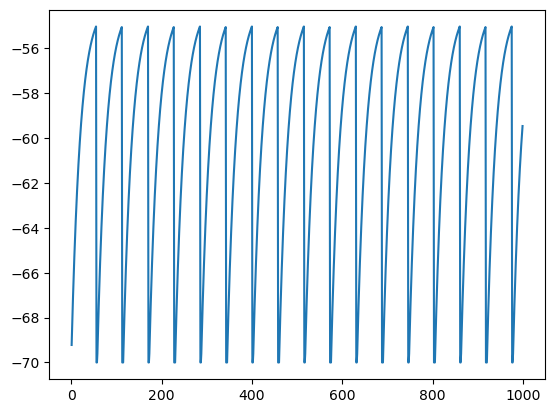

In [9]:
plt.plot(times, Vms)

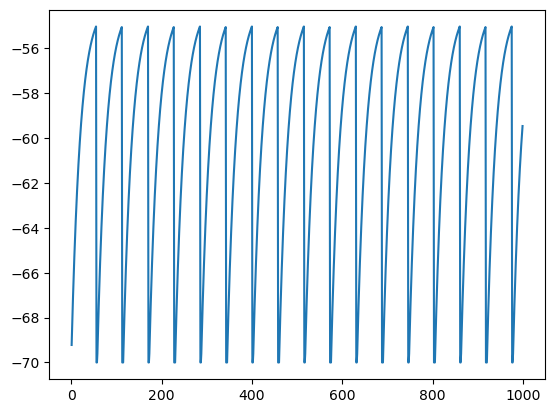

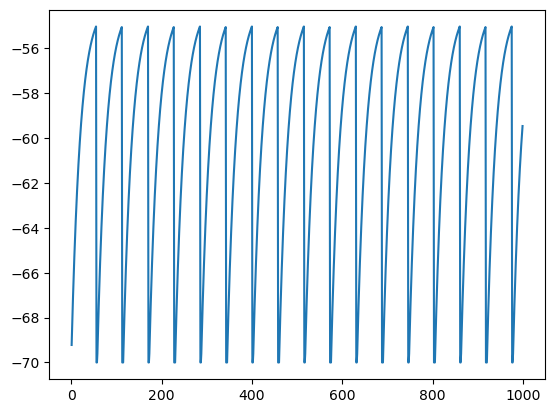

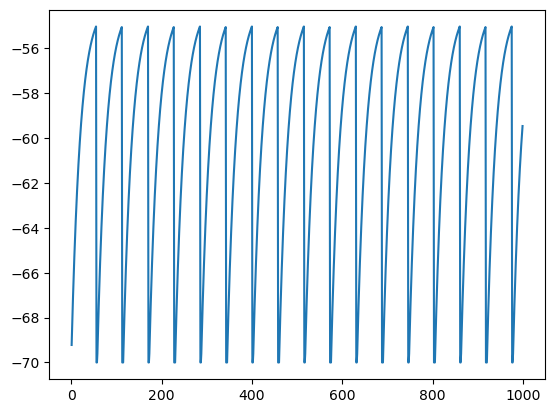

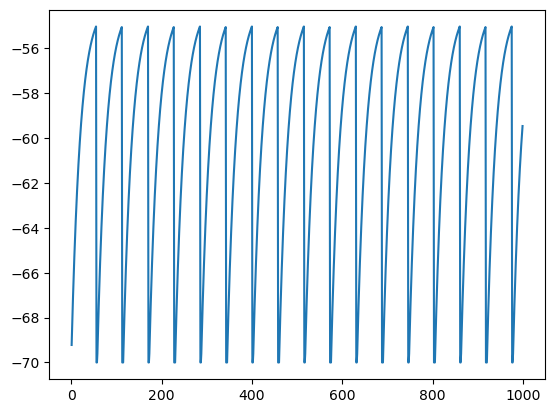

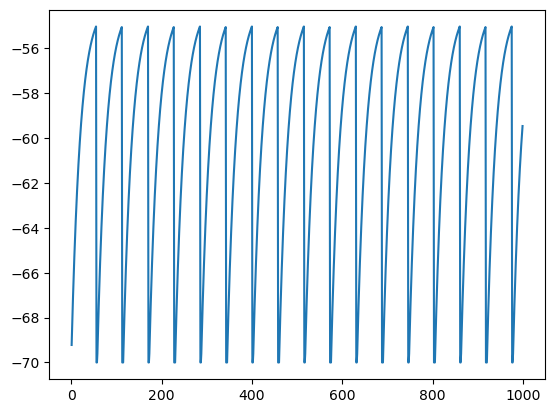

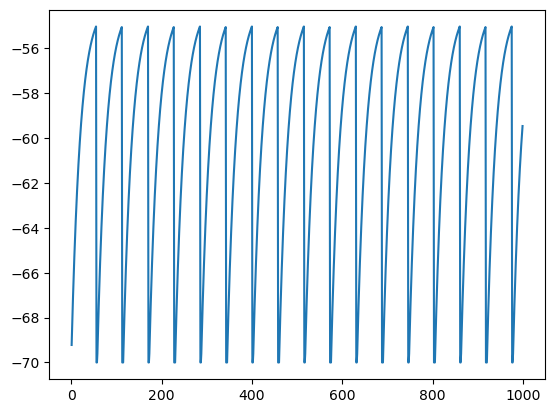

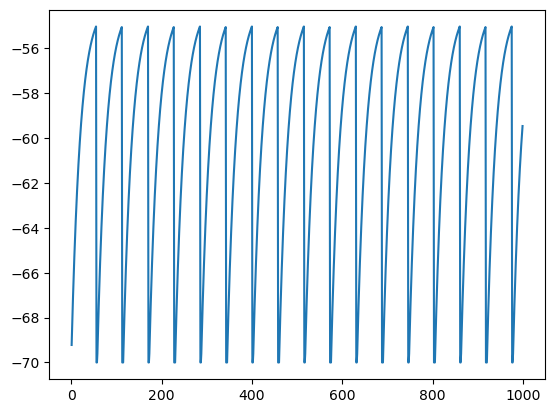

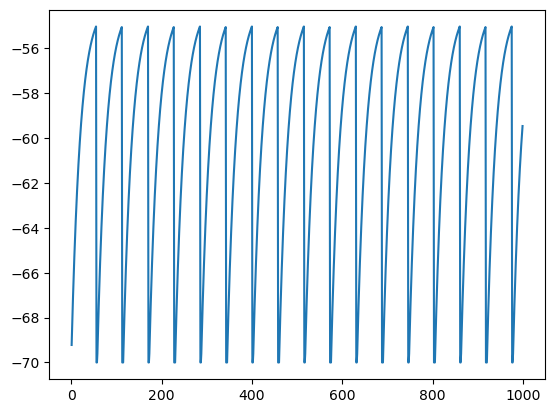

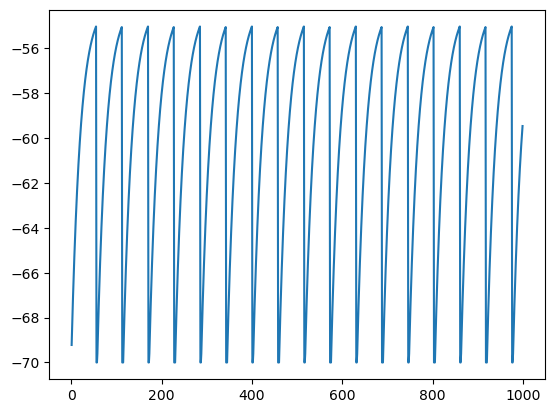

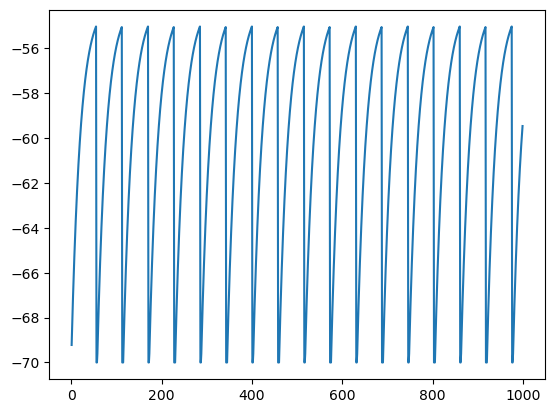

In [10]:
for i in range(10):
    plt.figure(i)
    plt.plot(times, dmm["events"][i]["V_m"])